In [1]:
# coding: utf-8
# # 电影数据分析案例
import json
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
from datetime import datetime
# 忽略python运行过程中的警告错误
import warnings
warnings.filterwarnings('ignore') 
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']   # SimHei是黑体
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [2]:
# 导入电影数据
# 数据在data.zip中，先解压，并将两个csv文件放在当前目录下
credits_file = './tmdb_5000_credits.csv'
movies_file = './tmdb_5000_movies.csv'
credits = pd.read_csv(credits_file)
movies = pd.read_csv(movies_file)

In [3]:
# 查看数据集信息
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
# 查看数据信息
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
#数据清洗
# 合并数据集
fulldf = pd.concat([credits,movies],axis=1)
# 查看合并后的数据集信息
fulldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
movie_id                4803 non-null int64
title                   4803 non-null object
cast                    4803 non-null object
crew                    4803 non-null object
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null ob

In [6]:
#选取子集
moviesdf = fulldf[['original_title','crew','release_date','genres','keywords','production_companies',
                   'production_countries','revenue','budget','runtime','vote_average']]
moviesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 11 columns):
original_title          4803 non-null object
crew                    4803 non-null object
release_date            4802 non-null object
genres                  4803 non-null object
keywords                4803 non-null object
production_companies    4803 non-null object
production_countries    4803 non-null object
revenue                 4803 non-null int64
budget                  4803 non-null int64
runtime                 4801 non-null float64
vote_average            4803 non-null float64
dtypes: float64(2), int64(2), object(7)
memory usage: 412.8+ KB


In [7]:
# 增加profit列
moviesdf['profit'] = moviesdf['revenue'] - moviesdf['budget']
moviesdf.head()

,original_title,crew,release_date,genres,keywords,production_companies,production_countries,revenue,budget,runtime,vote_average,profit
0,Avatar,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009-12-10,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2787965087,237000000,162.0,7.2,2550965087
1,Pirates of the Caribbean: At World's End,"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007-05-19,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",961000000,300000000,169.0,6.9,661000000
2,Spectre,"[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015-10-26,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",880674609,245000000,148.0,6.3,635674609
3,The Dark Knight Rises,"[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",2012-07-16,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1084939099,250000000,165.0,7.6,834939099
4,John Carter,"[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012-03-07,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",284139100,260000000,132.0,6.1,24139100


In [8]:
# 缺失值处理
#通过上面的数据集信息可以知道：整个数据集缺失的数据比较少
# **其中release_date（首次上映日期）缺失1个数据，runtime（电影时长）缺失2个数据，可以通过网上查询补齐这个数据**
# 找出release_date（首次上映日期）缺失的数据
release_date_null = moviesdf['release_date'].isnull()
moviesdf.loc[release_date_null,:]
# 填充指定日期，从网上查到这部电影上映日期为2014年6月1日
moviesdf['release_date'] = movies['release_date'].fillna('2014-06-01')
# 修改日期格式
moviesdf['release_date'] = pd.to_datetime(moviesdf['release_date'],format='%Y-%m-%d')
moviesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 12 columns):
original_title          4803 non-null object
crew                    4803 non-null object
release_date            4803 non-null datetime64[ns]
genres                  4803 non-null object
keywords                4803 non-null object
production_companies    4803 non-null object
production_countries    4803 non-null object
revenue                 4803 non-null int64
budget                  4803 non-null int64
runtime                 4801 non-null float64
vote_average            4803 non-null float64
profit                  4803 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 450.4+ KB


In [9]:
# 缺失值处理
# 找出runtime（电影时长）缺失的数据
runtime_date_null = moviesdf['runtime'].isnull()
moviesdf.loc[runtime_date_null,:]

,original_title,crew,release_date,genres,keywords,production_companies,production_countries,revenue,budget,runtime,vote_average,profit
2656,Chiamatemi Francesco - Il Papa della gente,"[{""credit_id"": ""5660019ac3a36875f100252b"", ""de...",2015-12-03,"[{""id"": 18, ""name"": ""Drama""}]","[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...","[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",0,15000000,NaN,7.3,-15000000
4140,"To Be Frank, Sinatra at 100","[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de...",2015-12-12,"[{""id"": 99, ""name"": ""Documentary""}]","[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...","[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",0,2,NaN,0.0,-2


In [10]:
# 缺失值处理
#填充runtime缺失值
'''
网上查询结果：
电影《Chiamatemi Francesco - Il Papa della gente》的时长为98分钟；
电影《To Be Frank, Sinatra at 100》的时长为81分钟
'''
values1 = {'runtime':98.0}
values2 = {'runtime':81.0}
moviesdf.fillna(value=values1,limit = 1,inplace = True)
moviesdf.fillna(value=values2,limit = 1,inplace = True)

moviesdf.loc[runtime_date_null,:]

,original_title,crew,release_date,genres,keywords,production_companies,production_countries,revenue,budget,runtime,vote_average,profit
2656,Chiamatemi Francesco - Il Papa della gente,"[{""credit_id"": ""5660019ac3a36875f100252b"", ""de...",2015-12-03,"[{""id"": 18, ""name"": ""Drama""}]","[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...","[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",0,15000000,98.0,7.3,-15000000
4140,"To Be Frank, Sinatra at 100","[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de...",2015-12-12,"[{""id"": 99, ""name"": ""Documentary""}]","[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...","[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",0,2,81.0,0.0,-2


In [11]:
#数据格式转换
# **genres列数据处理**
# genres列格式化，建立包含所有genre类型的列表
moviesdf['genres'] = moviesdf['genres'].apply(json.loads)
# 自定义函数解码json数据
def decode(column):
    z = []
    for i in column:
        z.append(i['name'])
    return ' '.join(z)

moviesdf['genres'] = moviesdf['genres'].apply(decode)
moviesdf.head(2)

,original_title,crew,release_date,genres,keywords,production_companies,production_countries,revenue,budget,runtime,vote_average,profit
0,Avatar,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009-12-10,Action Adventure Fantasy Science Fiction,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2787965087,237000000,162.0,7.2,2550965087
1,Pirates of the Caribbean: At World's End,"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007-05-19,Adventure Fantasy Action,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",961000000,300000000,169.0,6.9,661000000


In [12]:
# 建立genres列表，提取电影的类型
genres_list = set()
for i in moviesdf['genres'].str.split(' '):
    genres_list = set().union(i,genres_list)
    genres_list = list(genres_list)
    genres_list
    
genres_list.remove('')
genres_list

['Western',
 'Foreign',
 'Crime',
 'Adventure',
 'Action',
 'Comedy',
 'War',
 'Family',
 'Movie',
 'Fantasy',
 'Music',
 'Horror',
 'Animation',
 'Mystery',
 'Thriller',
 'TV',
 'Documentary',
 'Drama',
 'Fiction',
 'Romance',
 'History',
 'Science']

In [13]:
# release_date列数据处理
# 保留日期中的年份
moviesdf['release_date'] = pd.to_datetime(moviesdf['release_date']).dt.year
columns = {'release_date':'year'}
moviesdf.rename(columns=columns,inplace=True)
moviesdf['year'].apply(int).head()

0    2009
1    2007
2    2015
3    2012
4    2012
Name: year, dtype: int64

In [14]:
#数据分析及可视化
# ## 问题一：电影类型如何随着时间的推移发生变化的？
# ### （1）建立包含年份与电影类型数量的关系数据框
for genre in genres_list:
    moviesdf[genre] = moviesdf['genres'].str.contains(genre).apply(lambda x:1 if x else 0)
genre_year = moviesdf.loc[:,genres_list]

In [15]:
# 把年份作为索引标签
genre_year.index = moviesdf['year']
# 将数据集按年份分组并求和，得出每个年份，各电影类型的电影总数
genresdf = genre_year.groupby('year').sum()
# 查看数据集,tail默认查看后5行的数据
genresdf.tail()

,Western,Foreign,Crime,Adventure,Action,Comedy,War,Family,Movie,Fantasy,...,Animation,Mystery,Thriller,TV,Documentary,Drama,Fiction,Romance,History,Science
year,,,,,,,,,,,,,,,,,,,,,
2013,1,0,37,36,56,71,3,22,2,21,...,17,5,53,2,10,110,27,25,8,27
2014,3,0,27,37,54,62,10,23,0,16,...,14,15,66,0,7,110,26,24,7,26
2015,7,0,26,35,46,52,2,17,0,10,...,13,20,67,0,7,95,28,23,9,28
2016,1,0,10,23,39,26,3,9,0,13,...,4,6,27,0,0,37,11,9,6,11
2017,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [16]:
# 汇总电影类型的数量
genresdfSum = genresdf.sum(axis=0).sort_values(ascending=False)
genresdfSum

Drama          2297
Comedy         1722
Thriller       1274
Action         1154
Romance         894
Adventure       790
Crime           696
Science         535
Fiction         535
Horror          519
Family          513
Fantasy         424
Mystery         348
Animation       234
History         197
Music           185
War             144
Documentary     110
Western          82
Foreign          34
Movie             8
TV                8
dtype: int64

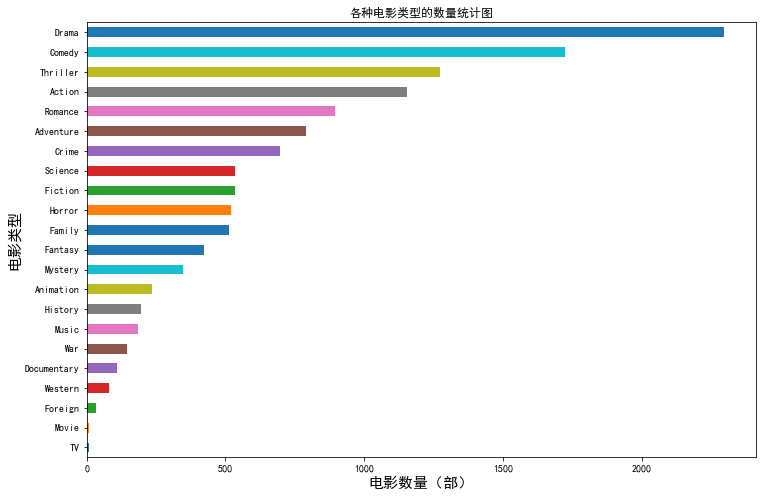

In [17]:
# ### （2）数据可视化
# ### 绘制柱状图
# 设置画板大小
fig=plt.figure(figsize=(12,8))
# 创建画纸，这里只使用1张画纸绘图，图形直接输出在整张画纸上
ax1 = plt.subplot(111)
# 在画纸上绘图
# 电影类型的数量按降序排序
rects = genresdfSum.sort_values(ascending=True).plot(kind='barh',label='genres')
plt.title('各种电影类型的数量统计图')
plt.xlabel('电影数量（部）',fontsize=15)
plt.ylabel('电影类型',fontsize=15)
plt.show()

Text(0.5,1,'各种电影类型所占的比例')

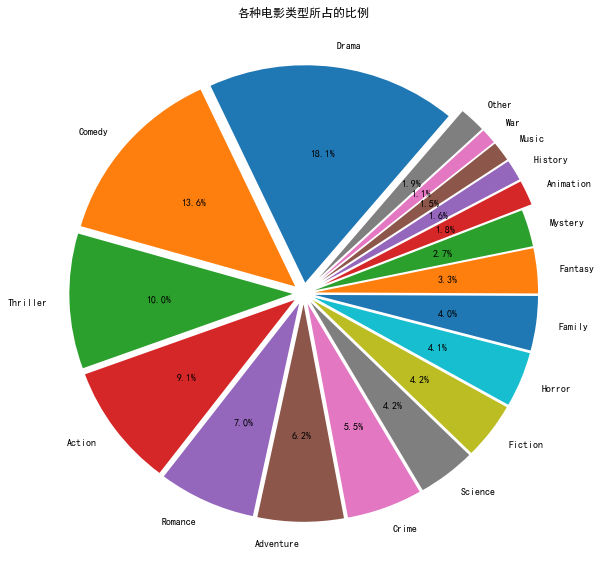

In [18]:
# ### 绘制饼状图
genres_pie = genresdfSum / genresdfSum.sum()

# 设置other类，当电影类型所占比例小于%1时，全部归到other类中
others = 0.01
genres_pie_otr = genres_pie[genres_pie >= others]
genres_pie_otr['Other'] = genres_pie[genres_pie < others].sum()

# 所占比例小于或等于%2时，对应的饼状图往外长高一截
explode = (genres_pie_otr <= 0.02) / 20 + 0.05 

# 设置饼状图的参数
genres_pie_otr.plot(kind='pie',label='',startangle=50,shadow=False,
                   figsize=(10,10),autopct='%1.1f%%',explode=explode)

plt.title('各种电影类型所占的比例')

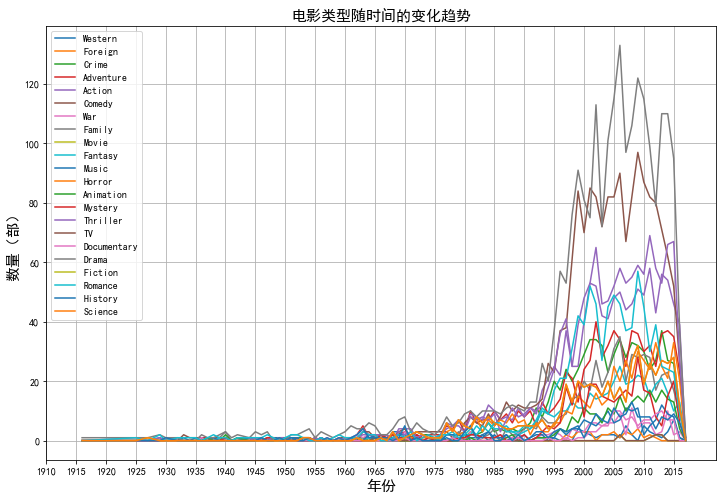

In [19]:
# ### 电影类型随时间变化的趋势分析
plt.figure(figsize=(12,8))
plt.plot(genresdf,label=genresdf.columns)
plt.xticks(range(1910,2018,5))
plt.legend(genresdf)
plt.title('电影类型随时间的变化趋势',fontsize=15)
plt.xlabel('年份',fontsize=15)
plt.ylabel('数量（部）',fontsize=15)
plt.grid(True)
plt.show()

In [20]:
# ## 问题二：电影类型与利润的关系？
# 把电影类型作为索引
mean_genre_profit = pd.DataFrame(index=genres_list)

# 求出每种电影类型的平均利润
newarray = []
for genre in genres_list:
    newarray.append(moviesdf.groupby(genre,as_index=True)['profit'].mean())
newarray2 = []
for i in range(len(genres_list)):
    newarray2.append(newarray[i][1])
mean_genre_profit['mean_profit'] = newarray2
mean_genre_profit.head()

,mean_profit
Western,1.916726e+07
Foreign,-2.934369e+05
Crime,3.830085e+07
Adventure,1.423333e+08
Action,8.970235e+07


<Figure size 864x576 with 0 Axes>

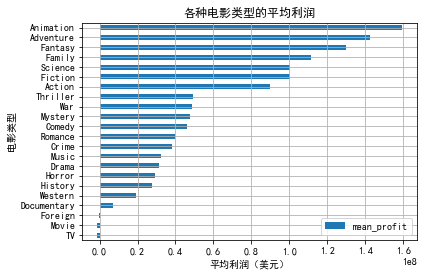

In [21]:
# 问题二 数据可视化
plt.figure(figsize=(12,8))

# 对于mean_profit列数据按值大小进行降序排序
mean_genre_profit.sort_values(by='mean_profit',ascending=True).plot(kind='barh')

plt.title('各种电影类型的平均利润')
plt.xlabel('平均利润（美元）')
plt.ylabel('电影类型')
plt.grid(True)
plt.show()

In [22]:
#问题三：Universal Pictures和Paramount Pictures两家影视公司的电影发行对比情况
#（1）查看 Universal Pictures和Paramount Pictures两家影视公司电影发行的数量
# production_companies列数据格式化
moviesdf['production_companies'] = moviesdf['production_companies'].apply(json.loads)
# 调用自定义函数decode处理production_companies列数据
moviesdf['production_companies'] = moviesdf['production_companies'].apply(decode)
moviesdf.head(2)

,original_title,crew,year,genres,keywords,production_companies,production_countries,revenue,budget,runtime,...,Animation,Mystery,Thriller,TV,Documentary,Drama,Fiction,Romance,History,Science
0,Avatar,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009,Action Adventure Fantasy Science Fiction,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Ingenious Film Partners Twentieth Century Fox ...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2787965087,237000000,162.0,...,0,0,0,0,0,0,1,0,0,1
1,Pirates of the Caribbean: At World's End,"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007,Adventure Fantasy Action,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Walt Disney Pictures Jerry Bruckheimer Films S...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",961000000,300000000,169.0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# 查询production_companies数据列中是否含有Universal Pictures、Paramount Pictures，有则标记为1
moviesdf['Universal Pictures'] = moviesdf['production_companies'].str.contains('Universal Pictures').apply(lambda x:1 if x else 0)
moviesdf['Paramount Pictures'] = moviesdf['production_companies'].str.contains('Paramount Pictures').apply(lambda x:1 if x else 0)
# 统计Universal Pictures和Paramount Pictures的数据
a = moviesdf['Universal Pictures'].sum()
b = moviesdf['Paramount Pictures'].sum()
dict_company = {'Universal':a,'Paramount':b}
company_vs = pd.Series(dict_company)
company_vs

Universal    314
Paramount    285
dtype: int64

Text(0.5,1,'Universal Pictures和Paramount Pictures两家公司电影发行数量对比')

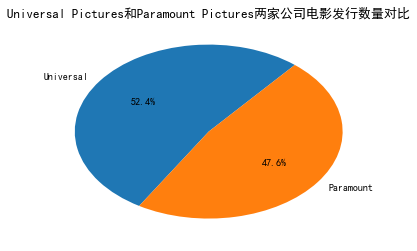

In [24]:
# 使用饼状图显示两家公司发行电影所占的比例
company_vs.plot(kind='pie',label='',startangle=50,shadow=False,autopct='%1.1f%%')
plt.title('Universal Pictures和Paramount Pictures两家公司电影发行数量对比',fontsize=13)

In [25]:
# 分析Universal Pictures和Paramount Pictures两家影视公司电影发行的走势

# 抽取相关数据列，以release_year作为索引
companydf = moviesdf[['Universal Pictures','Paramount Pictures']]
companydf.index = moviesdf['year']

# 对Universal和Paramount公司的发行数量按年分组求和
companydf = companydf.groupby('year').sum()
companydf.tail()

,Universal Pictures,Paramount Pictures
year,,
2013,9,8
2014,10,8
2015,13,7
2016,10,5
2017,0,0


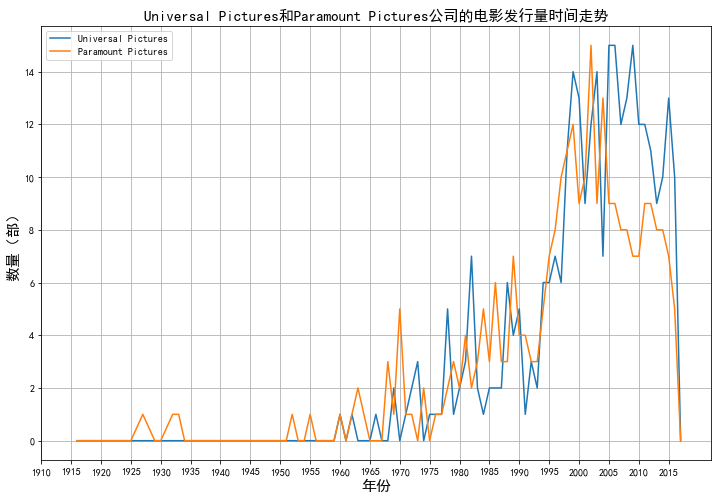

In [26]:
# 问题三 绘制发行量时间走势图
plt.figure(figsize=(12,8))
plt.plot(companydf,label=companydf.columns)
plt.xticks(range(1910,2018,5))
plt.legend(companydf)
plt.title('Universal Pictures和Paramount Pictures公司的电影发行量时间走势',fontsize=15)
plt.xlabel('年份',fontsize=15)
plt.ylabel('数量（部）',fontsize=15)
plt.grid(True)
plt.show()

In [27]:
# ## 问题四：改编电影和原创电影的对比情况如何？
# keywords列数据格式化
moviesdf['keywords'] = moviesdf['keywords'].apply(json.loads)
# 调用自定义函数decode处理keywords列数据
moviesdf['keywords'] = moviesdf['keywords'].apply(decode)
moviesdf['keywords'].tail()

4798    united states–mexico barrier legs arms paper k...
4799                                                     
4800    date love at first sight narration investigati...
4801                                                     
4802                 obsession camcorder crush dream girl
Name: keywords, dtype: object

In [28]:
# 提取关键字
a = 'based on novel'
moviesdf['if_original'] = moviesdf['keywords'].str.contains(a).apply(lambda x: 'no original' if x else 'original')
moviesdf['if_original'].value_counts()

original       4606
no original     197
Name: if_original, dtype: int64

In [29]:
original_profit = moviesdf[['if_original','budget','revenue','profit']]
original_profit = original_profit.groupby(by='if_original').mean()
original_profit

,budget,revenue,profit
if_original,,,
no original,4.532546e+07,1.438100e+08,9.848457e+07
original,2.834872e+07,7.962815e+07,5.127943e+07


<Figure size 864x576 with 0 Axes>

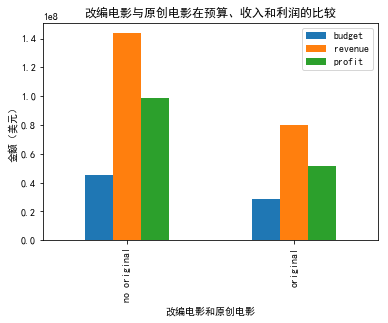

In [30]:
# 问题四 绘制改编电影与原创电影在预算、收入和利润的比较图
plt.figure(figsize=(12,8))
original_profit.plot(kind='bar')
plt.title('改编电影与原创电影在预算、收入和利润的比较')
plt.xlabel('改编电影和原创电影')
plt.ylabel('金额（美元）')
plt.show()

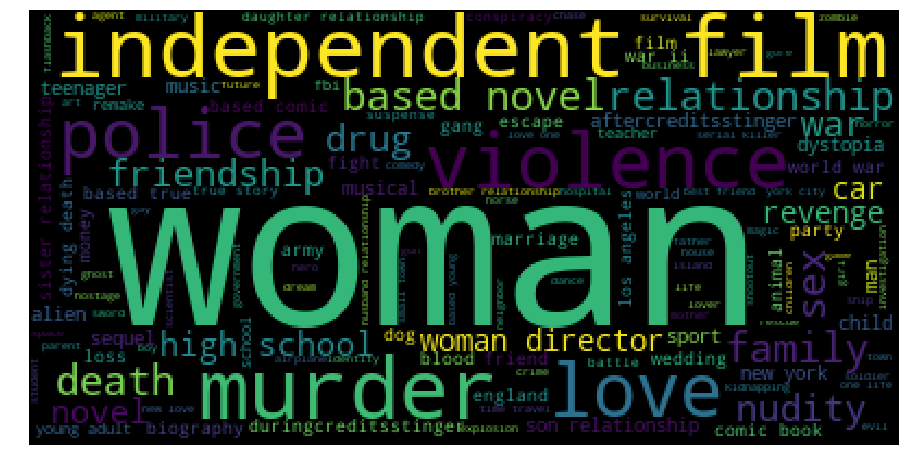

In [33]:
# ## 问题五：分析电影关键字
# 需要安装Wordcloud 库  pip install wordcloud
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator  # 导入词云包

# 利用电影关键字制作词云图
# 建立keywords_list列表
keywords_list = []
for i in moviesdf['keywords']:
    keywords_list.append(i)
    keywords_list = list(keywords_list)
    keywords_list

# 把字符串列表连接成一个长字符串
lis = ''.join(keywords_list)
# 使用空格替换中间多余的字符串'\'s'
lis.replace('\'s','')

# 生成词云
wc = WordCloud( background_color="black", # 背景颜色  
                max_words=2000,           # 词云显示的最大词数  
                max_font_size=100,        # 字体最大值  
                random_state=12,          # 设置一个随机种子，用于随机着色
                )  

# 根据字符串生成词云
wc.generate(lis)
  
plt.figure(figsize=(16, 8))
# 以下代码显示图片  
plt.imshow(wc)  
plt.axis("off")  
plt.show()

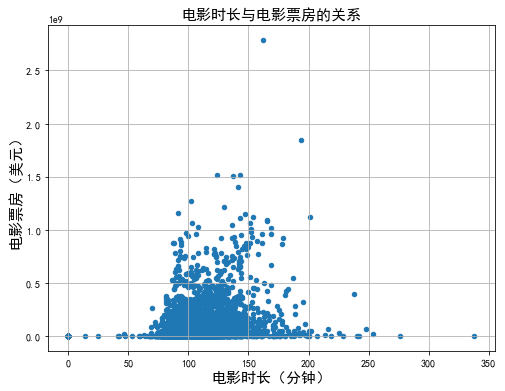

In [31]:
# ## 问题六：电影时长与电影票房及评分的关系
# 电影时长与电影票房的关系
moviesdf.plot(kind='scatter', x='runtime', y='revenue', figsize=(8, 6))
plt.title('电影时长与电影票房的关系',fontsize=15)
plt.xlabel('电影时长（分钟）',fontsize=15)
plt.ylabel('电影票房（美元）',fontsize=15)
plt.grid(True)
plt.show()

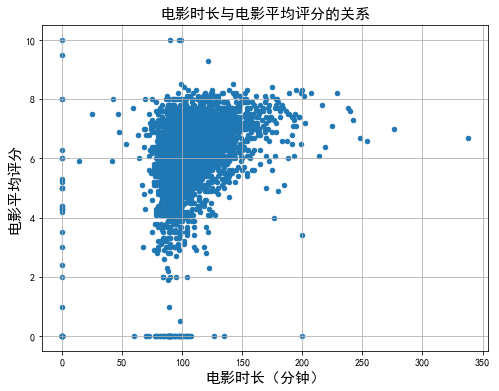

In [32]:
# 电影时长与评分的关系
moviesdf.plot(kind='scatter', x='runtime', y='vote_average', figsize=(8, 6))
plt.title('电影时长与电影平均评分的关系',fontsize=15)
plt.xlabel('电影时长（分钟）',fontsize=15)
plt.ylabel('电影平均评分',fontsize=15)
plt.grid(True)
plt.show()